###기본 세팅

In [122]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터 전처리
- VISIT JEJU에서 수집한 제주 관광객들의 설문조사 결과 데이터
  + 관광객의 정보 습득 경로와 여행 중 불만족 했던 요소, 여행 경비에 대한 만족도 조사 데이터
- 2018년 부터 21년까지의 데이터로 월별 카테고리 수집

### 정보습득경로 데이터 전처리

In [2]:
import pandas as pd

DATA_path = '/content/drive/MyDrive/세프/DATA/'

info_2018 = pd.read_excel(DATA_path + '2018년 정보습득경로.xlsx')
info_2018.head()

,table,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,사례수,자국의 인터넷 사이트/앱,한국의 여행관련 사이트/앱,자국 여행사(오프라인),관광안내책자,"친지, 친구, 동료",현지 한국 공공기관 및 박람회,과거여행경험,"주요 언론매체(TV, 라디오, 신문, 잡지 등)","항공사, 호텔",기타,정보를 얻지 않음
1,[전체],NaN,6181,60.1,1.9,0.5,0.5,21.1,0,13.8,0.5,0.1,0.1,1.2
2,월별,01월,492,55.8,10.2,0.8,2.5,15,0,11.6,1.8,0,0.3,2.1
3,월별,02월,420,57.9,8.2,0.6,0.7,19.4,0,9.7,1.3,0.5,0.8,0.9
4,월별,03월,486,57.6,5,0.5,1.3,19.1,0.3,8.9,2.3,0,0,5


In [3]:
columns = {'table' : '분석 카테고리',
           'Unnamed: 1' : '세부 카테고리',
           'Unnamed: 2' : '사례수',
           'Unnamed: 3' : '자국의 인터넷 사이트/앱',
           'Unnamed: 4' : '한국의 여행관련 사이트/앱',
           'Unnamed: 5' : '자국 여행사(오프라인)',
           'Unnamed: 6' : '관광안내책자',
           'Unnamed: 7' : '친지, 친구, 동료',
           'Unnamed: 8' : '현지 한국 공공기관 및 박람회',
           'Unnamed: 9' : '과거여행경험',
           'Unnamed: 10' : '주요 언론매체(TV, 라디오, 신문, 잡지 등)',
           'Unnamed: 11' : '항공사, 호텔',
           'Unnamed: 12' : '기타',
           'Unnamed: 13' : '정보를 얻지 않음',
           }

info_2018 = info_2018.rename(columns=columns)
info_2018

,분석 카테고리,세부 카테고리,사례수,자국의 인터넷 사이트/앱,한국의 여행관련 사이트/앱,자국 여행사(오프라인),관광안내책자,"친지, 친구, 동료",현지 한국 공공기관 및 박람회,과거여행경험,"주요 언론매체(TV, 라디오, 신문, 잡지 등)","항공사, 호텔",기타,정보를 얻지 않음
0,NaN,NaN,사례수,자국의 인터넷 사이트/앱,한국의 여행관련 사이트/앱,자국 여행사(오프라인),관광안내책자,"친지, 친구, 동료",현지 한국 공공기관 및 박람회,과거여행경험,"주요 언론매체(TV, 라디오, 신문, 잡지 등)","항공사, 호텔",기타,정보를 얻지 않음
1,[전체],NaN,6181,60.1,1.9,0.5,0.5,21.1,0,13.8,0.5,0.1,0.1,1.2
2,월별,01월,492,55.8,10.2,0.8,2.5,15,0,11.6,1.8,0,0.3,2.1
3,월별,02월,420,57.9,8.2,0.6,0.7,19.4,0,9.7,1.3,0.5,0.8,0.9
4,월별,03월,486,57.6,5,0.5,1.3,19.1,0.3,8.9,2.3,0,0,5
5,월별,04월,576,42.2,0.5,0.2,1.4,36.7,0,14.6,0,0.3,0,4.1
6,월별,05월,567,51,0,0,0.4,28.4,0,19.3,0.4,0,0,0.4
7,월별,06월,554,53.2,0,0.5,0,22.2,0,22.3,0,0,0,1.7
8,월별,07월,528,75.7,0,0,0.2,16.2,0,7.9,0,0,0,0
9,월별,08월,540,75.9,0.2,2,0,16,0,5.4,0.2,0,0.2,0


In [4]:
info_2018 = info_2018.iloc[2:14, :]

In [5]:
info_2018=info_2018.reset_index(drop=True)
info_2018

,분석 카테고리,세부 카테고리,사례수,자국의 인터넷 사이트/앱,한국의 여행관련 사이트/앱,자국 여행사(오프라인),관광안내책자,"친지, 친구, 동료",현지 한국 공공기관 및 박람회,과거여행경험,"주요 언론매체(TV, 라디오, 신문, 잡지 등)","항공사, 호텔",기타,정보를 얻지 않음
0,월별,01월,492,55.8,10.2,0.8,2.5,15,0,11.6,1.8,0,0.3,2.1
1,월별,02월,420,57.9,8.2,0.6,0.7,19.4,0,9.7,1.3,0.5,0.8,0.9
2,월별,03월,486,57.6,5,0.5,1.3,19.1,0.3,8.9,2.3,0,0,5
3,월별,04월,576,42.2,0.5,0.2,1.4,36.7,0,14.6,0,0.3,0,4.1
4,월별,05월,567,51,0,0,0.4,28.4,0,19.3,0.4,0,0,0.4
5,월별,06월,554,53.2,0,0.5,0,22.2,0,22.3,0,0,0,1.7
6,월별,07월,528,75.7,0,0,0.2,16.2,0,7.9,0,0,0,0
7,월별,08월,540,75.9,0.2,2,0,16,0,5.4,0.2,0,0.2,0
8,월별,09월,517,63.7,0.3,0,0,20,0,15.6,0,0,0,0.5
9,월별,10월,531,66.5,0.2,0.5,0,15.1,0,17.2,0.5,0,0,0


In [6]:
import pandas as pd

DATA_path = '/content/drive/MyDrive/세프/DATA/'

info_2019 = pd.read_excel(DATA_path + '2019년 정보습득경로.xlsx')
columns = {'table' : '분석 카테고리',
           'Unnamed: 1' : '세부 카테고리',
           'Unnamed: 2' : '사례수',
           'Unnamed: 3' : '자국의 인터넷 사이트/앱',
           'Unnamed: 4' : '한국의 여행관련 사이트/앱',
           'Unnamed: 5' : '자국 여행사(오프라인)',
           'Unnamed: 6' : '관광안내책자',
           'Unnamed: 7' : '친지, 친구, 동료',
           'Unnamed: 8' : '현지 한국 공공기관 및 박람회',
           'Unnamed: 9' : '과거여행경험',
           'Unnamed: 10' : '주요 언론매체(TV, 라디오, 신문, 잡지 등)',
           'Unnamed: 11' : '항공사, 호텔',
           'Unnamed: 12' : '기타',
           'Unnamed: 13' : '정보를 얻지 않음',
           }

info_2019 = info_2019.rename(columns=columns)
info_2019 = info_2019.iloc[2:14, :].reset_index(drop=True)
info_2019

,분석 카테고리,세부 카테고리,사례수,자국의 인터넷 사이트/앱,한국의 여행관련 사이트/앱,자국 여행사(오프라인),관광안내책자,"친지, 친구, 동료",현지 한국 공공기관 및 박람회,과거여행경험,"주요 언론매체(TV, 라디오, 신문, 잡지 등)","항공사, 호텔",기타
0,월별,01월,463,75,0.2,0,15.9,0,8.2,0.2,0,0,0.5
1,월별,02월,452,73.4,0.3,0,20.6,0,3.2,0,1.1,0,1.3
2,월별,03월,470,70.4,0,0,24.2,0,4.4,0.2,0,0,0.8
3,월별,04월,524,79,1.3,0,16.5,0,2.7,0.3,0,0,0.2
4,월별,05월,532,76.7,0,0,16.8,0,6.3,0.2,0,0,0
5,월별,06월,523,77.1,1.3,0,15.4,0,5.2,0,0,0,1
6,월별,07월,524,78.2,2.5,0.2,14.8,0,2.6,0,0,0,1.6
7,월별,08월,562,81.3,0.5,0.2,11.9,0,4.9,0.4,0.3,0,0.4
8,월별,09월,467,72.1,3,1.1,15.3,0,6.7,1,0,0.2,0.5
9,월별,10월,567,75.9,3.3,0.5,13.6,0.1,4.6,0.5,0,0.9,0.8


In [7]:
import pandas as pd

DATA_path = '/content/drive/MyDrive/세프/DATA/'

info_2020 = pd.read_excel(DATA_path + '2020년 정보습득경로.xlsx')
columns = {'table' : '분석 카테고리',
           'Unnamed: 1' : '세부 카테고리',
           'Unnamed: 2' : '사례수',
           'Unnamed: 3' : '자국의 인터넷 사이트/앱',
           'Unnamed: 4' : '한국의 여행관련 사이트/앱',
           'Unnamed: 5' : '자국 여행사(오프라인)',
           'Unnamed: 6' : '관광안내책자',
           'Unnamed: 7' : '친지, 친구, 동료',
           'Unnamed: 8' : '현지 한국 공공기관 및 박람회',
           'Unnamed: 9' : '과거여행경험',
           'Unnamed: 10' : '주요 언론매체(TV, 라디오, 신문, 잡지 등)',
           'Unnamed: 11' : '항공사, 호텔',
           'Unnamed: 12' : '기타',
           'Unnamed: 13' : '정보를 얻지 않음',
           }
info_2020 = info_2020.rename(columns=columns)
info_2020 = info_2020.iloc[4:11, :].reset_index(drop=True)
info_2020

,분석 카테고리,세부 카테고리,사례수,자국의 인터넷 사이트/앱,한국의 여행관련 사이트/앱,자국 여행사(오프라인),관광안내책자,"친지, 친구, 동료",현지 한국 공공기관 및 박람회,과거여행경험,"주요 언론매체(TV, 라디오, 신문, 잡지 등)","항공사, 호텔",기타
0,월별,01월,602,72.6,0.2,1.2,12.1,0.2,12,0.4,0.2,0,1
1,월별,02월,327,77.7,1.5,0.7,7.6,0.2,10.3,1,0.2,0.3,0.5
2,월별,08월,614,60.4,1.6,3.1,14.9,0,14.6,2.3,1.2,0.6,1.4
3,월별,09월,396,64.9,1.8,1.4,12.5,0,13.9,1.8,0.8,0.6,2.5
4,월별,10월,584,59.5,0.2,2.4,14.9,0.2,17.1,2.2,0.4,0.6,2.6
5,월별,11월,620,61.1,1.2,2,15.4,0.2,15.8,1.2,0.6,0.2,2.4
6,월별,12월,341,58.7,3.5,3.9,12,0.6,16.3,1.8,1.4,0.2,1.6


In [8]:
import pandas as pd

DATA_path = '/content/drive/MyDrive/세프/DATA/'

info_2021 = pd.read_excel(DATA_path + '2021년 정보습득경로.xlsx')
columns = {'table' : '분석 카테고리',
           'Unnamed: 1' : '세부 카테고리',
           'Unnamed: 2' : '사례수',
           'Unnamed: 3' : '자국의 인터넷 사이트/앱',
           'Unnamed: 4' : '한국의 여행관련 사이트/앱',
           'Unnamed: 5' : '자국 여행사(오프라인)',
           'Unnamed: 6' : '관광안내책자',
           'Unnamed: 7' : '친지, 친구, 동료',
           'Unnamed: 8' : '현지 한국 공공기관 및 박람회',
           'Unnamed: 9' : '과거여행경험',
           'Unnamed: 10' : '주요 언론매체(TV, 라디오, 신문, 잡지 등)',
           'Unnamed: 11' : '항공사, 호텔',
           'Unnamed: 12' : '기타',
           'Unnamed: 13' : '정보를 얻지 않음',
           }
info_2021 = info_2021.rename(columns=columns)
info_2021 = info_2021.iloc[2:11, :].reset_index(drop=True)
info_2021

,분석 카테고리,세부 카테고리,사례수,자국의 인터넷 사이트/앱,한국의 여행관련 사이트/앱,자국 여행사(오프라인),관광안내책자,"친지, 친구, 동료",현지 한국 공공기관 및 박람회,과거여행경험,"주요 언론매체(TV, 라디오, 신문, 잡지 등)","항공사, 호텔",기타
0,월별,01월,237,53.6,4.1,3.5,15.7,1.2,16.7,1.8,1,0,2.4
1,월별,02월,402,63,1.6,2.6,13.1,0.2,17.2,1.2,0.6,0,0.6
2,월별,06월,576,64.5,3.3,1.7,13,1,11.6,1.4,0.6,0.4,2.5
3,월별,07월,572,65.6,4.7,1.3,11.8,0.8,10.9,0.4,1.7,0.4,2.3
4,월별,08월,493,66.5,3.1,1.7,10.4,0.8,13.4,0.8,0.8,0.2,2.3
5,월별,09월,441,67.1,4,1.3,9,0.6,11.7,1.2,1.2,0.4,3.5
6,월별,10월,619,66.4,3.5,1.2,12.7,0.4,12.1,1.2,0.8,0.4,1.4
7,월별,11월,610,61.8,3.6,1.2,14.6,0.2,15.4,0.4,0.4,0.4,2
8,월별,12월,552,62.6,5,1.8,14.6,0,12,0.8,1.2,0.2,1.8


### 여행 시 불만족점 데이터 전처리

In [9]:
import pandas as pd

DATA_path = '/content/drive/MyDrive/세프/DATA/'

dis_2018 = pd.read_excel(DATA_path + '2018년 여행 시 불만족점.xlsx')
dis_2018.head()

,table,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,NaN,사례수,여행정보를 얻기 어렵다,관광정보가 정확하지 않다,관광종사원이 불친절하다,안내표지판이 부정확하다,식당과 음식이 불결하다,음식이 입에 맞지 않는다,물가가 비싸다,대중교통 이용이 불편하다,택시기사 서비스가 불편하다,관광가이드의 서비스가 좋지 않다,쇼핑품목이 다양하지 못하다,상품구입을 강요한다,기타,불만족하거나 불편했던 점이 없다
1,[전체],NaN,6181,2.1,2.2,3.1,1.8,1.6,1.4,22.9,5.3,1.5,0.3,2.8,0.6,7.1,63.6
2,월별,01월,492,10.8,9.1,7,5,6.5,4.8,41.2,15.8,4.8,1,9.3,3.1,21.7,22.7
3,월별,02월,420,7.1,7.6,4.9,3.9,4.7,3.9,41.9,25,3.1,0.8,8.8,2.5,21.3,21.1
4,월별,03월,486,3.7,2.7,6.3,4.7,1.8,2.9,41.7,10.7,3.5,0.3,10.2,1.3,9,38.9


In [10]:
columns = {'table' : '분석 카테고리',
           'Unnamed: 1' : '세부 카테고리',
           'Unnamed: 2' : '사례수',
           'Unnamed: 3' : '여행정보를 얻기 어렵다',
           'Unnamed: 4' : '관광정보가 정확하지 않다',
           'Unnamed: 5' : '관광종사원이 불친절하다',
           'Unnamed: 6' : '안내표지판이 부정확하다',
           'Unnamed: 7' : '식당과 음식이 불결하다',
           'Unnamed: 8' : '음식이 입에 맞지 않는다',
           'Unnamed: 9' : '물가가 비싸다',
           'Unnamed: 10' : '대중교통 이용이 불편하다',
           'Unnamed: 11' : '택시기사 서비스가 불편하다',
           'Unnamed: 12' : '관광가이드의 서비스가 좋지 않다',
           'Unnamed: 13' : '쇼핑품목이 다양하지 않다',
           'Unnamed: 14' : '상품구입을 강요한다' ,
           'Unnamed: 15' : '기타',
           'Unnamed: 16' : '불만족하거나 불편했던 점이 없다'
           }

dis_2018 = dis_2018.rename(columns=columns)
dis_2018

,분석 카테고리,세부 카테고리,사례수,여행정보를 얻기 어렵다,관광정보가 정확하지 않다,관광종사원이 불친절하다,안내표지판이 부정확하다,식당과 음식이 불결하다,음식이 입에 맞지 않는다,물가가 비싸다,대중교통 이용이 불편하다,택시기사 서비스가 불편하다,관광가이드의 서비스가 좋지 않다,쇼핑품목이 다양하지 않다,상품구입을 강요한다,기타,불만족하거나 불편했던 점이 없다
0,NaN,NaN,사례수,여행정보를 얻기 어렵다,관광정보가 정확하지 않다,관광종사원이 불친절하다,안내표지판이 부정확하다,식당과 음식이 불결하다,음식이 입에 맞지 않는다,물가가 비싸다,대중교통 이용이 불편하다,택시기사 서비스가 불편하다,관광가이드의 서비스가 좋지 않다,쇼핑품목이 다양하지 못하다,상품구입을 강요한다,기타,불만족하거나 불편했던 점이 없다
1,[전체],NaN,6181,2.1,2.2,3.1,1.8,1.6,1.4,22.9,5.3,1.5,0.3,2.8,0.6,7.1,63.6
2,월별,01월,492,10.8,9.1,7,5,6.5,4.8,41.2,15.8,4.8,1,9.3,3.1,21.7,22.7
3,월별,02월,420,7.1,7.6,4.9,3.9,4.7,3.9,41.9,25,3.1,0.8,8.8,2.5,21.3,21.1
4,월별,03월,486,3.7,2.7,6.3,4.7,1.8,2.9,41.7,10.7,3.5,0.3,10.2,1.3,9,38.9
5,월별,04월,576,1.1,2.4,1.3,2.8,0.4,0.7,26.2,3.2,1.4,0.5,0.7,0,4.4,62.5
6,월별,05월,567,0.7,1.3,1.6,0.2,1.1,0.5,14.6,1.3,0.9,0,0.4,0.2,3.4,77.2
7,월별,06월,554,0,1.2,2.6,1.4,1,1,19.7,1.9,0.7,0,0.7,0,5.8,70.4
8,월별,07월,528,0.2,0.3,5.5,1,0.7,0,12.6,4.4,2.4,0.2,1.4,0,5.3,73.6
9,월별,08월,540,1.4,1.9,3.7,1.1,1,0.9,16.3,2.7,1.3,0.4,0.7,0.2,3.7,73.7


In [11]:
dis_2018 = dis_2018.drop(index = [0, 1]).reset_index(drop=True)
dis_2018

,분석 카테고리,세부 카테고리,사례수,여행정보를 얻기 어렵다,관광정보가 정확하지 않다,관광종사원이 불친절하다,안내표지판이 부정확하다,식당과 음식이 불결하다,음식이 입에 맞지 않는다,물가가 비싸다,대중교통 이용이 불편하다,택시기사 서비스가 불편하다,관광가이드의 서비스가 좋지 않다,쇼핑품목이 다양하지 않다,상품구입을 강요한다,기타,불만족하거나 불편했던 점이 없다
0,월별,01월,492,10.8,9.1,7,5,6.5,4.8,41.2,15.8,4.8,1,9.3,3.1,21.7,22.7
1,월별,02월,420,7.1,7.6,4.9,3.9,4.7,3.9,41.9,25,3.1,0.8,8.8,2.5,21.3,21.1
2,월별,03월,486,3.7,2.7,6.3,4.7,1.8,2.9,41.7,10.7,3.5,0.3,10.2,1.3,9,38.9
3,월별,04월,576,1.1,2.4,1.3,2.8,0.4,0.7,26.2,3.2,1.4,0.5,0.7,0,4.4,62.5
4,월별,05월,567,0.7,1.3,1.6,0.2,1.1,0.5,14.6,1.3,0.9,0,0.4,0.2,3.4,77.2
5,월별,06월,554,0,1.2,2.6,1.4,1,1,19.7,1.9,0.7,0,0.7,0,5.8,70.4
6,월별,07월,528,0.2,0.3,5.5,1,0.7,0,12.6,4.4,2.4,0.2,1.4,0,5.3,73.6
7,월별,08월,540,1.4,1.9,3.7,1.1,1,0.9,16.3,2.7,1.3,0.4,0.7,0.2,3.7,73.7
8,월별,09월,517,0.3,0.5,1.6,0.5,0,0.7,17.4,0.3,0,0,0.5,0,5.3,76.6
9,월별,10월,531,0.5,0.5,2.1,0.9,1.4,0.5,17.5,1.2,0.2,0.2,1.6,0,4.1,75.8


In [12]:
dis_2018 = dis_2018.iloc[:12, :]

In [13]:
dis_2018

,분석 카테고리,세부 카테고리,사례수,여행정보를 얻기 어렵다,관광정보가 정확하지 않다,관광종사원이 불친절하다,안내표지판이 부정확하다,식당과 음식이 불결하다,음식이 입에 맞지 않는다,물가가 비싸다,대중교통 이용이 불편하다,택시기사 서비스가 불편하다,관광가이드의 서비스가 좋지 않다,쇼핑품목이 다양하지 않다,상품구입을 강요한다,기타,불만족하거나 불편했던 점이 없다
0,월별,01월,492,10.8,9.1,7,5,6.5,4.8,41.2,15.8,4.8,1,9.3,3.1,21.7,22.7
1,월별,02월,420,7.1,7.6,4.9,3.9,4.7,3.9,41.9,25,3.1,0.8,8.8,2.5,21.3,21.1
2,월별,03월,486,3.7,2.7,6.3,4.7,1.8,2.9,41.7,10.7,3.5,0.3,10.2,1.3,9,38.9
3,월별,04월,576,1.1,2.4,1.3,2.8,0.4,0.7,26.2,3.2,1.4,0.5,0.7,0,4.4,62.5
4,월별,05월,567,0.7,1.3,1.6,0.2,1.1,0.5,14.6,1.3,0.9,0,0.4,0.2,3.4,77.2
5,월별,06월,554,0,1.2,2.6,1.4,1,1,19.7,1.9,0.7,0,0.7,0,5.8,70.4
6,월별,07월,528,0.2,0.3,5.5,1,0.7,0,12.6,4.4,2.4,0.2,1.4,0,5.3,73.6
7,월별,08월,540,1.4,1.9,3.7,1.1,1,0.9,16.3,2.7,1.3,0.4,0.7,0.2,3.7,73.7
8,월별,09월,517,0.3,0.5,1.6,0.5,0,0.7,17.4,0.3,0,0,0.5,0,5.3,76.6
9,월별,10월,531,0.5,0.5,2.1,0.9,1.4,0.5,17.5,1.2,0.2,0.2,1.6,0,4.1,75.8


In [14]:
import pandas as pd

DATA_path = '/content/drive/MyDrive/세프/DATA/'

dis_2019 = pd.read_excel(DATA_path + '2019년 여행 시 불만족점.xlsx')
dis_2019.head()

,table,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,NaN,사례수,여행정보를 얻기 어렵다,관광정보가 정확하지 않다,관광종사원이 불친절하다,안내표지판이 부정확하다,식당과 음식이 불결하다,음식이 입에 맞지 않는다,물가가 비싸다,대중교통 이용이 불편하다,택시기사 서비스가 불편하다,관광가이드의 서비스가 좋지 않다,쇼핑품목이 다양하지 못하다,상품구입을 강요한다,기타,불만족하거나 불편했던 점이 없다
1,[전체],NaN,6133,1.5,2.1,3.1,1.7,1.6,1.8,29.1,3.9,1,0.4,3.7,0.5,4,60
2,월별,01월,463,1.5,1.4,4.5,0.7,0.3,0.2,11,4,1.1,0,0.7,0.2,2.9,77.2
3,월별,02월,452,0.5,0.5,1,0.5,0,0.5,10.8,0.8,0.2,0,0.7,0,1.2,85.4
4,월별,03월,470,0.7,0.9,0.5,0.5,0.5,0.5,12.3,2.8,0.2,0.2,1.8,0.2,4.5,78.7


In [15]:
columns = {'table' : '분석 카테고리',
           'Unnamed: 1' : '세부 카테고리',
           'Unnamed: 2' : '사례수',
           'Unnamed: 3' : '여행정보를 얻기 어렵다',
           'Unnamed: 4' : '관광정보가 정확하지 않다',
           'Unnamed: 5' : '관광종사원이 불친절하다',
           'Unnamed: 6' : '안내표지판이 부정확하다',
           'Unnamed: 7' : '식당과 음식이 불결하다',
           'Unnamed: 8' : '음식이 입에 맞지 않는다',
           'Unnamed: 9' : '물가가 비싸다',
           'Unnamed: 10' : '대중교통 이용이 불편하다',
           'Unnamed: 11' : '택시기사 서비스가 불편하다',
           'Unnamed: 12' : '관광가이드의 서비스가 좋지 않다',
           'Unnamed: 13' : '쇼핑품목이 다양하지 않다',
           'Unnamed: 14' : '상품구입을 강요한다' ,
           'Unnamed: 15' : '기타',
           'Unnamed: 16' : '불만족하거나 불편했던 점이 없다'
           }

dis_2019 = dis_2019.rename(columns=columns)
dis_2019

,분석 카테고리,세부 카테고리,사례수,여행정보를 얻기 어렵다,관광정보가 정확하지 않다,관광종사원이 불친절하다,안내표지판이 부정확하다,식당과 음식이 불결하다,음식이 입에 맞지 않는다,물가가 비싸다,대중교통 이용이 불편하다,택시기사 서비스가 불편하다,관광가이드의 서비스가 좋지 않다,쇼핑품목이 다양하지 않다,상품구입을 강요한다,기타,불만족하거나 불편했던 점이 없다
0,NaN,NaN,사례수,여행정보를 얻기 어렵다,관광정보가 정확하지 않다,관광종사원이 불친절하다,안내표지판이 부정확하다,식당과 음식이 불결하다,음식이 입에 맞지 않는다,물가가 비싸다,대중교통 이용이 불편하다,택시기사 서비스가 불편하다,관광가이드의 서비스가 좋지 않다,쇼핑품목이 다양하지 못하다,상품구입을 강요한다,기타,불만족하거나 불편했던 점이 없다
1,[전체],NaN,6133,1.5,2.1,3.1,1.7,1.6,1.8,29.1,3.9,1,0.4,3.7,0.5,4,60
2,월별,01월,463,1.5,1.4,4.5,0.7,0.3,0.2,11,4,1.1,0,0.7,0.2,2.9,77.2
3,월별,02월,452,0.5,0.5,1,0.5,0,0.5,10.8,0.8,0.2,0,0.7,0,1.2,85.4
4,월별,03월,470,0.7,0.9,0.5,0.5,0.5,0.5,12.3,2.8,0.2,0.2,1.8,0.2,4.5,78.7
5,월별,04월,524,0.4,0.5,2.1,0.2,0.3,0.6,20,0.7,0.2,0.2,0.6,0.2,0.3,77
6,월별,05월,532,0.2,0.2,2.8,0.9,0.2,1.3,24.4,0.7,0.5,0,0.9,0.6,4,70
7,월별,06월,523,0.7,1.1,2.3,2.3,0.2,1.4,19.1,1.9,0.5,0.2,1.6,0,3.6,70.9
8,월별,07월,524,0.3,1.4,1,0.5,0.5,0,20,2,0.7,0.2,1.4,0,3.8,71.3
9,월별,08월,562,3,4.3,4.4,3.7,4.5,4,47.9,6.3,1.4,0.3,5.1,1.1,6.8,36.7


In [16]:
dis_2019 = dis_2019.iloc[2:14, :]

In [17]:
dis_2019.reset_index(drop=True)

,분석 카테고리,세부 카테고리,사례수,여행정보를 얻기 어렵다,관광정보가 정확하지 않다,관광종사원이 불친절하다,안내표지판이 부정확하다,식당과 음식이 불결하다,음식이 입에 맞지 않는다,물가가 비싸다,대중교통 이용이 불편하다,택시기사 서비스가 불편하다,관광가이드의 서비스가 좋지 않다,쇼핑품목이 다양하지 않다,상품구입을 강요한다,기타,불만족하거나 불편했던 점이 없다
0,월별,01월,463,1.5,1.4,4.5,0.7,0.3,0.2,11,4,1.1,0,0.7,0.2,2.9,77.2
1,월별,02월,452,0.5,0.5,1,0.5,0,0.5,10.8,0.8,0.2,0,0.7,0,1.2,85.4
2,월별,03월,470,0.7,0.9,0.5,0.5,0.5,0.5,12.3,2.8,0.2,0.2,1.8,0.2,4.5,78.7
3,월별,04월,524,0.4,0.5,2.1,0.2,0.3,0.6,20,0.7,0.2,0.2,0.6,0.2,0.3,77
4,월별,05월,532,0.2,0.2,2.8,0.9,0.2,1.3,24.4,0.7,0.5,0,0.9,0.6,4,70
5,월별,06월,523,0.7,1.1,2.3,2.3,0.2,1.4,19.1,1.9,0.5,0.2,1.6,0,3.6,70.9
6,월별,07월,524,0.3,1.4,1,0.5,0.5,0,20,2,0.7,0.2,1.4,0,3.8,71.3
7,월별,08월,562,3,4.3,4.4,3.7,4.5,4,47.9,6.3,1.4,0.3,5.1,1.1,6.8,36.7
8,월별,09월,467,3,3.2,3.9,2.1,2.5,3,41.6,7.1,1.6,0.2,6.5,1.2,5,44.8
9,월별,10월,567,2.5,2.6,5,2.6,3.2,4.8,44,5.5,0.5,0.7,8.5,1.4,4.4,41.2


In [18]:
import pandas as pd

DATA_path = '/content/drive/MyDrive/세프/DATA/'

dis_2020 = pd.read_excel(DATA_path + '2020년 여행 시 불만족점.xlsx')
columns = {'table' : '분석 카테고리',
           'Unnamed: 1' : '세부 카테고리',
           'Unnamed: 2' : '사례수',
           'Unnamed: 3' : '여행정보를 얻기 어렵다',
           'Unnamed: 4' : '관광정보가 정확하지 않다',
           'Unnamed: 5' : '관광종사원이 불친절하다',
           'Unnamed: 6' : '안내표지판이 부정확하다',
           'Unnamed: 7' : '식당과 음식이 불결하다',
           'Unnamed: 8' : '음식이 입에 맞지 않는다',
           'Unnamed: 9' : '물가가 비싸다',
           'Unnamed: 10' : '대중교통 이용이 불편하다',
           'Unnamed: 11' : '택시기사 서비스가 불편하다',
           'Unnamed: 12' : '관광가이드의 서비스가 좋지 않다',
           'Unnamed: 13' : '쇼핑품목이 다양하지 않다',
           'Unnamed: 14' : '상품구입을 강요한다' ,
           'Unnamed: 15' : '기타',
           'Unnamed: 16' : '불만족하거나 불편했던 점이 없다'
           }

dis_2020 = dis_2020.rename(columns=columns)
dis_2020

,분석 카테고리,세부 카테고리,사례수,여행정보를 얻기 어렵다,관광정보가 정확하지 않다,관광종사원이 불친절하다,안내표지판이 부정확하다,식당과 음식이 불결하다,음식이 입에 맞지 않는다,물가가 비싸다,대중교통 이용이 불편하다,택시기사 서비스가 불편하다,관광가이드의 서비스가 좋지 않다,쇼핑품목이 다양하지 않다,상품구입을 강요한다,기타,불만족하거나 불편했던 점이 없다
0,NaN,NaN,사례수,여행정보를 얻기 어렵다,관광정보가 정확하지 않다,관광종사원이 불친절하다,안내표지판이 부정확하다,식당과 음식이 불결하다,음식이 입에 맞지 않는다,물가가 비싸다,대중교통 이용이 불편하다,택시기사 서비스가 불편하다,관광가이드의 서비스가 좋지 않다,쇼핑품목이 다양하지 못하다,상품구입을 강요한다,기타,불만족하거나 불편했던 점이 없다
1,[전체],NaN,3483,5,6.6,6.3,6.1,4.6,3.7,54.9,17.1,3.8,1.9,16.4,3.7,2.9,29.9
2,구분,01-02월,928,2.8,2.3,4.4,3,2.4,2.1,43.2,14.2,1.8,0.5,7.3,1.2,3.1,41.4
3,구분,08-12월,2555,5.8,8.2,6.9,7.3,5.4,4.3,59.1,18.1,4.5,2.4,19.7,4.7,2.9,25.7
4,월별,01월,602,2.5,2.9,4.3,2.2,2.9,2.7,44.1,18.2,2.2,0.4,8.3,1.1,3.2,38.2
5,월별,02월,327,3.5,1.2,4.7,4.5,1.5,1,41.6,6.9,1,0.5,5.4,1.2,3.1,47.3
6,월별,08월,614,5.4,6.7,5.1,6,7.2,3.5,61.3,17.1,3.5,1.9,17.5,5.2,4.8,23.8
7,월별,09월,396,5.7,8.4,6.7,7.1,6.1,4.5,60.6,21.4,4.6,2.2,20.4,4.1,2.7,24.2
8,월별,10월,584,4.1,8.3,5.9,7.7,2.8,3.1,60.2,18.3,3.1,1.8,20.7,4.1,1.6,26.4
9,월별,11월,620,6.4,8.7,7.4,7.1,4.6,4.8,58.4,16.6,5.6,2.4,21,3.2,2.6,27.4


In [19]:
dis_2020 = dis_2020.iloc[4:11, :].reset_index(drop=True)

In [20]:
dis_2020

,분석 카테고리,세부 카테고리,사례수,여행정보를 얻기 어렵다,관광정보가 정확하지 않다,관광종사원이 불친절하다,안내표지판이 부정확하다,식당과 음식이 불결하다,음식이 입에 맞지 않는다,물가가 비싸다,대중교통 이용이 불편하다,택시기사 서비스가 불편하다,관광가이드의 서비스가 좋지 않다,쇼핑품목이 다양하지 않다,상품구입을 강요한다,기타,불만족하거나 불편했던 점이 없다
0,월별,01월,602,2.5,2.9,4.3,2.2,2.9,2.7,44.1,18.2,2.2,0.4,8.3,1.1,3.2,38.2
1,월별,02월,327,3.5,1.2,4.7,4.5,1.5,1,41.6,6.9,1,0.5,5.4,1.2,3.1,47.3
2,월별,08월,614,5.4,6.7,5.1,6,7.2,3.5,61.3,17.1,3.5,1.9,17.5,5.2,4.8,23.8
3,월별,09월,396,5.7,8.4,6.7,7.1,6.1,4.5,60.6,21.4,4.6,2.2,20.4,4.1,2.7,24.2
4,월별,10월,584,4.1,8.3,5.9,7.7,2.8,3.1,60.2,18.3,3.1,1.8,20.7,4.1,1.6,26.4
5,월별,11월,620,6.4,8.7,7.4,7.1,4.6,4.8,58.4,16.6,5.6,2.4,21,3.2,2.6,27.4
6,월별,12월,341,8.7,9.4,11.4,9.2,7.1,6.3,53,18.5,6.5,4.3,18.7,7.9,2.2,26.4


In [21]:
import pandas as pd

DATA_path = '/content/drive/MyDrive/세프/DATA/'

dis_2021 = pd.read_excel(DATA_path + '2021년 여행 시 불만족점.xlsx')
columns = {'table' : '분석 카테고리',
           'Unnamed: 1' : '세부 카테고리',
           'Unnamed: 2' : '사례수',
           'Unnamed: 3' : '여행정보를 얻기 어렵다',
           'Unnamed: 4' : '관광정보가 정확하지 않다',
           'Unnamed: 5' : '관광종사원이 불친절하다',
           'Unnamed: 6' : '안내표지판이 부정확하다',
           'Unnamed: 7' : '식당과 음식이 불결하다',
           'Unnamed: 8' : '음식이 입에 맞지 않는다',
           'Unnamed: 9' : '물가가 비싸다',
           'Unnamed: 10' : '대중교통 이용이 불편하다',
           'Unnamed: 11' : '택시기사 서비스가 불편하다',
           'Unnamed: 12' : '관광가이드의 서비스가 좋지 않다',
           'Unnamed: 13' : '쇼핑품목이 다양하지 않다',
           'Unnamed: 14' : '상품구입을 강요한다' ,
           'Unnamed: 15' : '기타',
           'Unnamed: 16' : '불만족하거나 불편했던 점이 없다'
           }

dis_2021 = dis_2021.rename(columns=columns)
dis_2021


,분석 카테고리,세부 카테고리,사례수,여행정보를 얻기 어렵다,관광정보가 정확하지 않다,관광종사원이 불친절하다,안내표지판이 부정확하다,식당과 음식이 불결하다,음식이 입에 맞지 않는다,물가가 비싸다,대중교통 이용이 불편하다,택시기사 서비스가 불편하다,관광가이드의 서비스가 좋지 않다,쇼핑품목이 다양하지 않다,상품구입을 강요한다,기타,불만족하거나 불편했던 점이 없다
0,NaN,NaN,사례수,물가가 비싸다,불만족하거나 불편했던 점이 없다,쇼핑품목이 다양하지 못하다,대중교통 이용이 불편하다,관광종사원이 불친절하다,안내표지판이 부정확하다,여행정보를 얻기 어렵다,식당과 음식이 불결하다,관광정보가 정확하지 않다,상품구입을 강요한다,음식이 입에 맞지 않는다,택시기사 서비스가 불편하다,관광가이드의 서비스가 좋지 않다,기타
1,전체,NaN,4500,57.4,25.7,18.8,18.1,9,8.8,7.5,7.3,6.7,5.6,5.4,4.5,3.2,2.4
2,월별,01월,237,50.1,25.2,18.3,18.7,10,13,8.8,8.8,8.8,8.9,6.7,6.3,4.7,3.3
3,월별,02월,402,55.2,27.9,18,18.1,7.7,10.9,9.3,6.2,7,4.8,6.2,6.2,3.8,1.4
4,월별,06월,576,60.3,25.7,18.7,18.1,6.9,8,6.8,6.1,5.1,6.5,3.3,3.3,2.4,3.5
5,월별,07월,572,64.5,20.2,18.8,17.6,9.8,9.6,8.2,9.8,6.1,6.4,5.2,4.8,2.9,2.7
6,월별,08월,493,54.4,26.4,21.2,15.2,8.3,8.3,6.8,8.9,7,4.5,4.3,3.7,2.7,3
7,월별,09월,441,57.7,23.3,21.9,20,10.8,8.7,9.6,6.7,8.9,5.8,7.5,5.2,3.1,2.1
8,월별,10월,619,57.8,25.6,17,20.3,13.6,8.2,6,7.7,7.2,6,6.7,3.8,5.3,1.8
9,월별,11월,610,56.8,27.6,17.1,17.3,7.4,6.3,7.8,6.3,4.6,4.7,4.9,4.4,2.6,3.2


In [22]:
dis_2021 = dis_2021.iloc[2:11, :].reset_index(drop=True)
dis_2021

,분석 카테고리,세부 카테고리,사례수,여행정보를 얻기 어렵다,관광정보가 정확하지 않다,관광종사원이 불친절하다,안내표지판이 부정확하다,식당과 음식이 불결하다,음식이 입에 맞지 않는다,물가가 비싸다,대중교통 이용이 불편하다,택시기사 서비스가 불편하다,관광가이드의 서비스가 좋지 않다,쇼핑품목이 다양하지 않다,상품구입을 강요한다,기타,불만족하거나 불편했던 점이 없다
0,월별,01월,237,50.1,25.2,18.3,18.7,10,13,8.8,8.8,8.8,8.9,6.7,6.3,4.7,3.3
1,월별,02월,402,55.2,27.9,18,18.1,7.7,10.9,9.3,6.2,7,4.8,6.2,6.2,3.8,1.4
2,월별,06월,576,60.3,25.7,18.7,18.1,6.9,8,6.8,6.1,5.1,6.5,3.3,3.3,2.4,3.5
3,월별,07월,572,64.5,20.2,18.8,17.6,9.8,9.6,8.2,9.8,6.1,6.4,5.2,4.8,2.9,2.7
4,월별,08월,493,54.4,26.4,21.2,15.2,8.3,8.3,6.8,8.9,7,4.5,4.3,3.7,2.7,3
5,월별,09월,441,57.7,23.3,21.9,20,10.8,8.7,9.6,6.7,8.9,5.8,7.5,5.2,3.1,2.1
6,월별,10월,619,57.8,25.6,17,20.3,13.6,8.2,6,7.7,7.2,6,6.7,3.8,5.3,1.8
7,월별,11월,610,56.8,27.6,17.1,17.3,7.4,6.3,7.8,6.3,4.6,4.7,4.9,4.4,2.6,3.2
8,월별,12월,552,54.1,28.9,19.4,18,7,9.6,5.8,6.2,7.8,4.2,5,4.2,2,1


### 여행경비 만족도 데이터 전처리


In [23]:
import pandas as pd

DATA_path = '/content/drive/MyDrive/세프/DATA/'

budget_2018 = pd.read_excel(DATA_path + '2018년 제주여행 평가_여행경비.xlsx')
budget_2018.head()

,table,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,사례수,①매우 불만족,②불만족,③보통,④만족,⑤매우 만족,①+②,③,④+⑤,[5점 평균],[100점 평균]
1,[전체],NaN,6139,1.9,6.9,27.1,46.4,17.6,8.8,27.1,64.1,3.71,67.75
2,월별,01월,477,7,18.5,39.7,24.5,10.4,25.5,39.7,34.9,3.13,53.19
3,월별,02월,410,7.7,17.6,44.8,24.2,5.7,25.3,44.8,29.9,3.03,50.64
4,월별,03월,479,3.8,14.6,29.8,39.1,12.7,18.4,29.8,51.7,3.42,60.54


In [24]:
columns = {'table' : '분석 카테고리',
           'Unnamed: 1' : '세부 카테고리',
           'Unnamed: 2' : '사례수',
           'Unnamed: 3' : '① 매우 불만족',
           'Unnamed: 4' : '② 불만족',
           'Unnamed: 5' : '③ 보통',
           'Unnamed: 6' : '④ 만족',
           'Unnamed: 7' : '⑤ 매우 만족',
           'Unnamed: 8' : '①+②',
           'Unnamed: 9' : '③',
           'Unnamed: 10' : '④+⑤',
           'Unnamed: 11' : '[5점 평균]',
           'Unnamed: 12' : '[100점 평균]',
           }

budget_2018 = budget_2018.rename(columns=columns)
budget_2018

,분석 카테고리,세부 카테고리,사례수,① 매우 불만족,② 불만족,③ 보통,④ 만족,⑤ 매우 만족,①+②,③,④+⑤,[5점 평균],[100점 평균]
0,NaN,NaN,사례수,①매우 불만족,②불만족,③보통,④만족,⑤매우 만족,①+②,③,④+⑤,[5점 평균],[100점 평균]
1,[전체],NaN,6139,1.9,6.9,27.1,46.4,17.6,8.8,27.1,64.1,3.71,67.75
2,월별,01월,477,7,18.5,39.7,24.5,10.4,25.5,39.7,34.9,3.13,53.19
3,월별,02월,410,7.7,17.6,44.8,24.2,5.7,25.3,44.8,29.9,3.03,50.64
4,월별,03월,479,3.8,14.6,29.8,39.1,12.7,18.4,29.8,51.7,3.42,60.54
5,월별,04월,575,0.9,3.5,22.8,57.6,15.1,4.5,22.8,72.7,3.82,70.61
6,월별,05월,567,0.4,2.7,10.7,67.3,18.9,3.1,10.7,86.2,4.02,75.39
7,월별,06월,553,0.5,5,22.3,51.4,20.8,5.5,22.3,72.2,3.87,71.74
8,월별,07월,527,0.9,4.7,23.8,47.9,22.6,5.6,23.8,70.5,3.87,71.65
9,월별,08월,540,1.2,5.9,31,44.6,17.2,7.1,31,61.8,3.71,67.67


In [25]:
budget_2018 = budget_2018.iloc[2:14, :].reset_index(drop=True)
budget_2018

,분석 카테고리,세부 카테고리,사례수,① 매우 불만족,② 불만족,③ 보통,④ 만족,⑤ 매우 만족,①+②,③,④+⑤,[5점 평균],[100점 평균]
0,월별,01월,477,7,18.5,39.7,24.5,10.4,25.5,39.7,34.9,3.13,53.19
1,월별,02월,410,7.7,17.6,44.8,24.2,5.7,25.3,44.8,29.9,3.03,50.64
2,월별,03월,479,3.8,14.6,29.8,39.1,12.7,18.4,29.8,51.7,3.42,60.54
3,월별,04월,575,0.9,3.5,22.8,57.6,15.1,4.5,22.8,72.7,3.82,70.61
4,월별,05월,567,0.4,2.7,10.7,67.3,18.9,3.1,10.7,86.2,4.02,75.39
5,월별,06월,553,0.5,5,22.3,51.4,20.8,5.5,22.3,72.2,3.87,71.74
6,월별,07월,527,0.9,4.7,23.8,47.9,22.6,5.6,23.8,70.5,3.87,71.65
7,월별,08월,540,1.2,5.9,31,44.6,17.2,7.1,31,61.8,3.71,67.67
8,월별,09월,516,0.7,5,24.5,37.8,32,5.7,24.5,69.8,3.95,73.84
9,월별,10월,528,0.5,5.5,28.7,46.8,18.5,6,28.7,65.3,3.77,69.32


In [26]:
DATA_path = '/content/drive/MyDrive/세프/DATA/'

budget_2019 = pd.read_excel(DATA_path + '2019년 제주여행 평가_여행경비.xlsx')
columns = {'table' : '분석 카테고리',
           'Unnamed: 1' : '세부 카테고리',
           'Unnamed: 2' : '사례수',
           'Unnamed: 3' : '① 매우 불만족',
           'Unnamed: 4' : '② 불만족',
           'Unnamed: 5' : '③ 보통',
           'Unnamed: 6' : '④ 만족',
           'Unnamed: 7' : '⑤ 매우 만족',
           'Unnamed: 9' : '①+②',
           'Unnamed: 10' : '③',
           'Unnamed: 11' : '④+⑤',
           'Unnamed: 13' : '[5점 평균]',
           'Unnamed: 14' : '[100점 평균]',
           }
del budget_2019['Unnamed: 8']
del budget_2019['Unnamed: 12']
budget_2019 = budget_2019.rename(columns=columns)
budget_2019 = budget_2019.iloc[2:14, :].reset_index(drop=True)
budget_2019

,분석 카테고리,세부 카테고리,사례수,① 매우 불만족,② 불만족,③ 보통,④ 만족,⑤ 매우 만족,①+②,③,④+⑤,[5점 평균],[100점 평균]
0,월별,01월,463,0.5,3.2,23.2,52.3,20.9,3.6,23.2,73.2,3.9,72.48
1,월별,02월,452,1,4,16.9,55.6,22.2,5.1,16.9,77.8,3.94,73.54
2,월별,03월,470,1.6,3.4,24.5,54.2,16.1,5,24.5,70.4,3.8,69.97
3,월별,04월,524,0.9,3.4,28.2,53.1,14.4,4.3,28.2,67.6,3.77,69.21
4,월별,05월,532,0.2,8.4,28.7,51.8,10.9,8.6,28.7,62.7,3.65,66.16
5,월별,06월,523,0.9,5.4,29.3,56,8.5,6.3,29.3,64.4,3.66,66.43
6,월별,07월,524,0.3,5.4,30.8,55,8.6,5.7,30.8,63.5,3.66,66.55
7,월별,08월,562,10.3,21.3,32.8,27.9,7.7,31.6,32.8,35.6,3.01,50.34
8,월별,09월,467,6.7,14,32.6,35.5,10.3,20.7,32.6,45.7,3.29,57.21
9,월별,10월,567,6.1,16.6,36.7,31.7,8.9,22.7,36.7,40.7,3.21,55.21


In [27]:
DATA_path = '/content/drive/MyDrive/세프/DATA/'

budget_2020 = pd.read_excel(DATA_path + '2020년 제주여행 평가_여행경비.xlsx')
columns = {'table' : '분석 카테고리',
           'Unnamed: 1' : '세부 카테고리',
           'Unnamed: 2' : '사례수',
           'Unnamed: 3' : '① 매우 불만족',
           'Unnamed: 4' : '② 불만족',
           'Unnamed: 5' : '③ 보통',
           'Unnamed: 6' : '④ 만족',
           'Unnamed: 7' : '⑤ 매우 만족',
           'Unnamed: 8' : '①+②',
           'Unnamed: 9' : '③',
           'Unnamed: 10' : '④+⑤',
           'Unnamed: 11' : '[5점 평균]',
           'Unnamed: 12' : '[100점 평균]',
           }

budget_2020 = budget_2020.rename(columns=columns)
budget_2020 = budget_2020.iloc[4:11, :].reset_index(drop=True)
budget_2020

,분석 카테고리,세부 카테고리,사례수,① 매우 불만족,② 불만족,③ 보통,④ 만족,⑤ 매우 만족,①+②,③,④+⑤,[5점 평균],[100점 평균]
0,월별,01월,600,4.7,16.9,37.2,31,10.2,21.6,37.2,41.2,3.25,56.26
1,월별,02월,327,3.5,10.9,36.3,39.3,10,14.4,36.3,49.4,3.42,60.39
2,월별,08월,604,12.8,32.5,33.4,17.3,4.1,45.3,33.4,21.4,2.67,41.86
3,월별,09월,392,12.4,32.1,35.8,16.2,3.6,44.5,35.8,19.7,2.66,41.59
4,월별,10월,580,8.5,31,35.5,19.6,5.4,39.5,35.5,25,2.82,45.59
5,월별,11월,603,10,31.1,35.4,17.8,5.7,41.1,35.4,23.6,2.78,44.55
6,월별,12월,339,6.7,25.7,36.4,24.2,6.9,32.5,36.4,31.1,2.99,49.7


In [28]:
DATA_path = '/content/drive/MyDrive/세프/DATA/'

budget_2021 = pd.read_excel(DATA_path + '2021년 제주여행 평가_여행경비.xlsx')
columns = {'table' : '분석 카테고리',
           'Unnamed: 1' : '세부 카테고리',
           'Unnamed: 2' : '사례수',
           'Unnamed: 3' : '① 매우 불만족',
           'Unnamed: 4' : '② 불만족',
           'Unnamed: 5' : '③ 보통',
           'Unnamed: 6' : '④ 만족',
           'Unnamed: 7' : '⑤ 매우 만족',
           'Unnamed: 8' : '①+②',
           'Unnamed: 9' : '③',
           'Unnamed: 10' : '④+⑤',
           'Unnamed: 11' : '[5점 평균]',
           'Unnamed: 12' : '[100점 평균]',
           }

budget_2021 = budget_2021.rename(columns=columns)
budget_2021 = budget_2021.iloc[2:11, :].reset_index(drop=True)
budget_2021

,분석 카테고리,세부 카테고리,사례수,① 매우 불만족,② 불만족,③ 보통,④ 만족,⑤ 매우 만족,①+②,③,④+⑤,[5점 평균],[100점 평균]
0,월별,01월,230,9.5,20.2,35.4,26,8.9,29.7,35.4,34.9,3.05,51.15
1,월별,02월,399,6.6,25.3,40.2,22.1,5.8,31.9,40.2,28,2.95,48.81
2,월별,06월,562,11.8,28.9,34.7,21.1,3.4,40.8,34.7,24.6,2.75,43.84
3,월별,07월,564,13.9,30.4,32.8,17.8,5.1,44.3,32.8,22.9,2.7,42.46
4,월별,08월,487,11.1,29.7,32.3,20.5,6.4,40.8,32.3,26.9,2.81,45.32
5,월별,09월,427,9.5,32,33.9,20.6,4,41.5,33.9,24.6,2.78,44.39
6,월별,10월,616,10.8,30.1,30.7,23.3,5.1,40.9,30.7,28.4,2.82,45.46
7,월별,11월,595,9.1,30.9,35.1,20.7,4.3,40,35.1,25,2.8,45.04
8,월별,12월,540,8.4,27.2,39.7,18.9,5.8,35.6,39.7,24.7,2.87,46.63


## 분석 및 시각화
- 정보습득경로 데이터: 월별, 연도별 변화를 관찰하기 위해 사용량 기준 상위 5개 컬럼 추출 후 선 그래프로 시각화
- 여행 시 불만족점: 불만족점을 카테고리화 해 구분짓기 위해 군집분석 진행
- 여행경비 만족도: 여행 간 소비에 대한 만족도를 정리하기 위해 월별 만족도를 정리하고 히트맵으로 시각화

### 정보습득경로 데이터 시각화


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
columns_2018=['세부 카테고리','자국의 인터넷 사이트/앱', '한국의 여행관련 사이트/앱', '관광안내책자', '친지, 친구, 동료', '과거여행경험']
data_2018=info_2018[columns_2018]
print(data_2018)
df_melted = data_2018.melt(id_vars=['세부 카테고리'], var_name='수집방법',value_name='값')

   세부 카테고리 자국의 인터넷 사이트/앱 한국의 여행관련 사이트/앱 관광안내책자 친지, 친구, 동료 과거여행경험
0      01월          55.8           10.2    2.5         15   11.6
1      02월          57.9            8.2    0.7       19.4    9.7
2      03월          57.6              5    1.3       19.1    8.9
3      04월          42.2            0.5    1.4       36.7   14.6
4      05월            51              0    0.4       28.4   19.3
5      06월          53.2              0      0       22.2   22.3
6      07월          75.7              0    0.2       16.2    7.9
7      08월          75.9            0.2      0         16    5.4
8      09월          63.7            0.3      0         20   15.6
9      10월          66.5            0.2      0       15.1   17.2
10     11월          57.9              0      0       20.9     20
11     12월          65.8              0      0       21.6   11.6


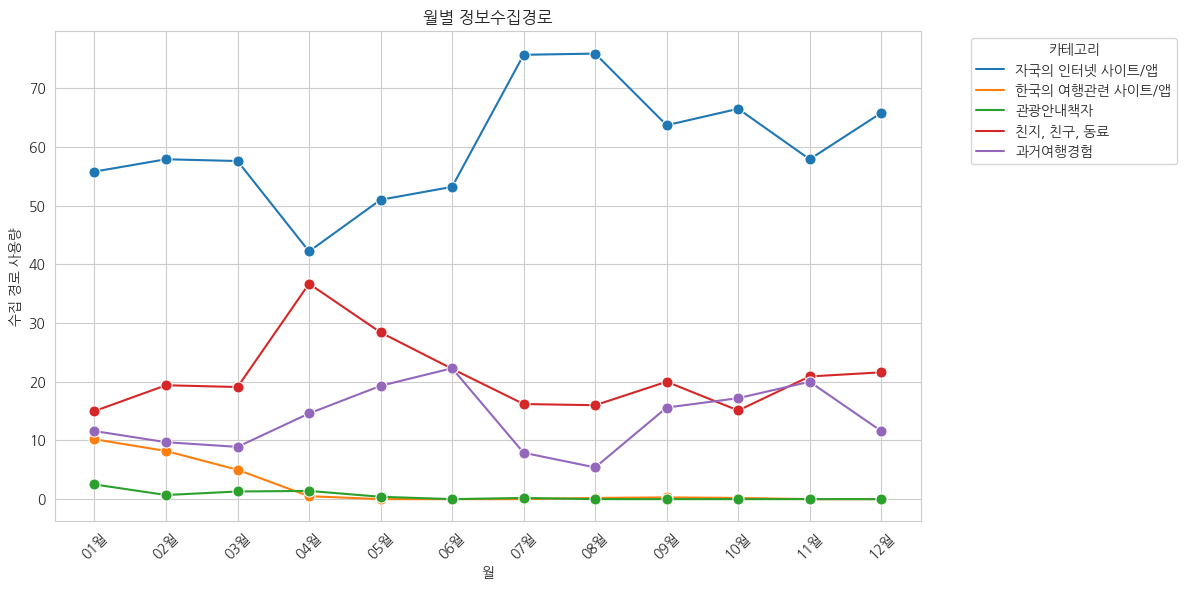

In [31]:
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='세부 카테고리', y='값', hue='수집방법', marker="o", markersize=8)
plt.title("월별 정보수집경로")
plt.xlabel("월")
plt.ylabel("수집 경로 사용량")
plt.legend(title="카테고리", bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 위치 조정


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

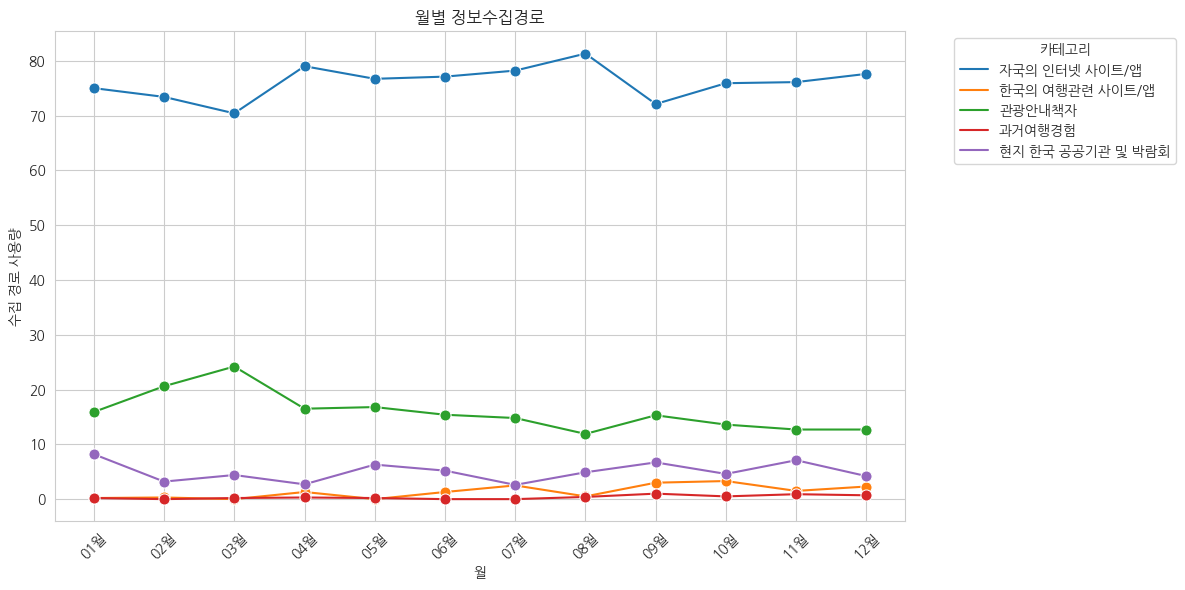

In [32]:
columns_2019=['세부 카테고리','자국의 인터넷 사이트/앱', '한국의 여행관련 사이트/앱', '관광안내책자', '과거여행경험', '현지 한국 공공기관 및 박람회'] #친구 친지... 현지 한국 공공기관 및 박람회로 대체
data_2019=info_2019[columns_2019]
df_melted = data_2019.melt(id_vars=['세부 카테고리'], var_name='수집방법',value_name='값')

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='세부 카테고리', y='값', hue='수집방법', marker="o", markersize=8)
plt.title("월별 정보수집경로")
plt.xlabel("월")
plt.ylabel("수집 경로 사용량")
plt.legend(title="카테고리", bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 위치 조정


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

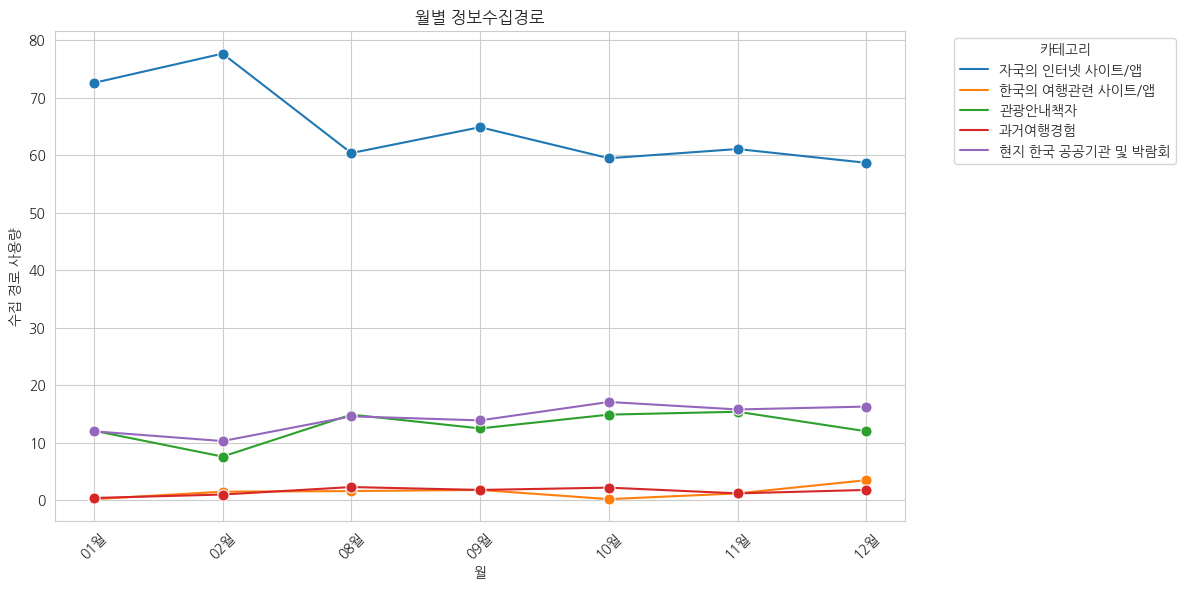

In [33]:
columns_2020=['세부 카테고리','자국의 인터넷 사이트/앱', '한국의 여행관련 사이트/앱', '관광안내책자', '과거여행경험', '현지 한국 공공기관 및 박람회'] #친구 친지... 현지 한국 공공기관 및 박람회로 대체
data_2020=info_2020[columns_2020]
df_melted = data_2020.melt(id_vars=['세부 카테고리'], var_name='수집방법',value_name='값')

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='세부 카테고리', y='값', hue='수집방법', marker="o", markersize=8)
plt.title("월별 정보수집경로")
plt.xlabel("월")
plt.ylabel("수집 경로 사용량")
plt.legend(title="카테고리", bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 위치 조정


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

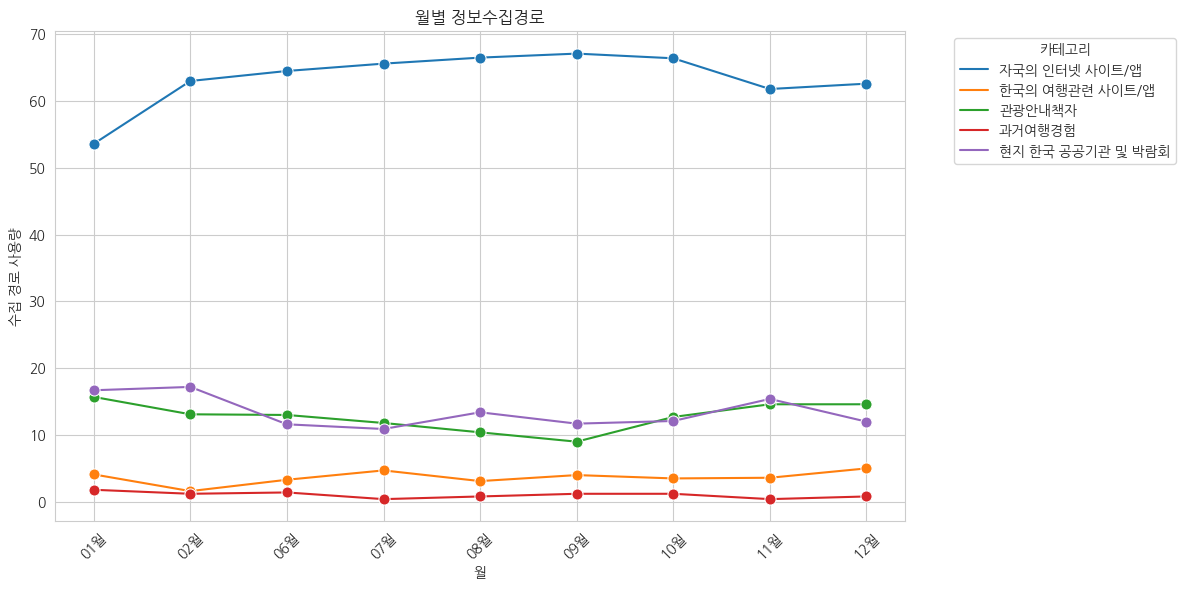

In [34]:
columns_2021=['세부 카테고리','자국의 인터넷 사이트/앱', '한국의 여행관련 사이트/앱', '관광안내책자', '과거여행경험', '현지 한국 공공기관 및 박람회'] #친구 친지... 현지 한국 공공기관 및 박람회로 대체
data_2021=info_2021[columns_2021]
df_melted = data_2021.melt(id_vars=['세부 카테고리'], var_name='수집방법',value_name='값')

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='세부 카테고리', y='값', hue='수집방법', marker="o", markersize=8)
plt.title("월별 정보수집경로")
plt.xlabel("월")
plt.ylabel("수집 경로 사용량")
plt.legend(title="카테고리", bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례 위치 조정


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
!pip install factor_analyzer

### 불만족점 군집분석

In [36]:
dis_2018['연도']=2018
dis_2019['연도']=2019
dis_2020['연도']=2020
dis_2021['연도']=2021

<ipython-input-36-5ee68c338147>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dis_2018['연도']=2018
<ipython-input-36-5ee68c338147>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dis_2019['연도']=2019


In [57]:
merge_dis= pd.concat([dis_2018, dis_2019, dis_2020, dis_2021], axis=0)
merge_dis

,분석 카테고리,세부 카테고리,사례수,여행정보를 얻기 어렵다,관광정보가 정확하지 않다,관광종사원이 불친절하다,안내표지판이 부정확하다,식당과 음식이 불결하다,음식이 입에 맞지 않는다,물가가 비싸다,대중교통 이용이 불편하다,택시기사 서비스가 불편하다,관광가이드의 서비스가 좋지 않다,쇼핑품목이 다양하지 않다,상품구입을 강요한다,기타,불만족하거나 불편했던 점이 없다,연도
0,월별,01월,492,10.8,9.1,7,5,6.5,4.8,41.2,15.8,4.8,1,9.3,3.1,21.7,22.7,2018
1,월별,02월,420,7.1,7.6,4.9,3.9,4.7,3.9,41.9,25,3.1,0.8,8.8,2.5,21.3,21.1,2018
2,월별,03월,486,3.7,2.7,6.3,4.7,1.8,2.9,41.7,10.7,3.5,0.3,10.2,1.3,9,38.9,2018
3,월별,04월,576,1.1,2.4,1.3,2.8,0.4,0.7,26.2,3.2,1.4,0.5,0.7,0,4.4,62.5,2018
4,월별,05월,567,0.7,1.3,1.6,0.2,1.1,0.5,14.6,1.3,0.9,0,0.4,0.2,3.4,77.2,2018
5,월별,06월,554,0,1.2,2.6,1.4,1,1,19.7,1.9,0.7,0,0.7,0,5.8,70.4,2018
6,월별,07월,528,0.2,0.3,5.5,1,0.7,0,12.6,4.4,2.4,0.2,1.4,0,5.3,73.6,2018
7,월별,08월,540,1.4,1.9,3.7,1.1,1,0.9,16.3,2.7,1.3,0.4,0.7,0.2,3.7,73.7,2018
8,월별,09월,517,0.3,0.5,1.6,0.5,0,0.7,17.4,0.3,0,0,0.5,0,5.3,76.6,2018
9,월별,10월,531,0.5,0.5,2.1,0.9,1.4,0.5,17.5,1.2,0.2,0.2,1.6,0,4.1,75.8,2018


In [66]:
feature_names = ['여행정보를 얻기 어렵다','관광정보가 정확하지 않다',	'관광종사원이 불친절하다',	'안내표지판이 부정확하다',	'식당과 음식이 불결하다',	'음식이 입에 맞지 않는다',	'물가가 비싸다',	'대중교통 이용이 불편하다',	'택시기사 서비스가 불편하다',	'관광가이드의 서비스가 좋지 않다',	'쇼핑품목이 다양하지 않다',	'상품구입을 강요한다',	'기타',	'불만족하거나 불편했던 점이 없다']
dis_df =merge_dis[feature_names]
dis_df

,여행정보를 얻기 어렵다,관광정보가 정확하지 않다,관광종사원이 불친절하다,안내표지판이 부정확하다,식당과 음식이 불결하다,음식이 입에 맞지 않는다,물가가 비싸다,대중교통 이용이 불편하다,택시기사 서비스가 불편하다,관광가이드의 서비스가 좋지 않다,쇼핑품목이 다양하지 않다,상품구입을 강요한다,기타,불만족하거나 불편했던 점이 없다
0,10.8,9.1,7,5,6.5,4.8,41.2,15.8,4.8,1,9.3,3.1,21.7,22.7
1,7.1,7.6,4.9,3.9,4.7,3.9,41.9,25,3.1,0.8,8.8,2.5,21.3,21.1
2,3.7,2.7,6.3,4.7,1.8,2.9,41.7,10.7,3.5,0.3,10.2,1.3,9,38.9
3,1.1,2.4,1.3,2.8,0.4,0.7,26.2,3.2,1.4,0.5,0.7,0,4.4,62.5
4,0.7,1.3,1.6,0.2,1.1,0.5,14.6,1.3,0.9,0,0.4,0.2,3.4,77.2
5,0,1.2,2.6,1.4,1,1,19.7,1.9,0.7,0,0.7,0,5.8,70.4
6,0.2,0.3,5.5,1,0.7,0,12.6,4.4,2.4,0.2,1.4,0,5.3,73.6
7,1.4,1.9,3.7,1.1,1,0.9,16.3,2.7,1.3,0.4,0.7,0.2,3.7,73.7
8,0.3,0.5,1.6,0.5,0,0.7,17.4,0.3,0,0,0.5,0,5.3,76.6
9,0.5,0.5,2.1,0.9,1.4,0.5,17.5,1.2,0.2,0.2,1.6,0,4.1,75.8


In [74]:
import numpy as np
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

In [71]:
dis_df.value_counts()

여행정보를 얻기 어렵다  관광정보가 정확하지 않다  관광종사원이 불친절하다  안내표지판이 부정확하다  식당과 음식이 불결하다  음식이 입에 맞지 않는다  물가가 비싸다  대중교통 이용이 불편하다  택시기사 서비스가 불편하다  관광가이드의 서비스가 좋지 않다  쇼핑품목이 다양하지 않다  상품구입을 강요한다  기타    불만족하거나 불편했던 점이 없다
0.0           1.2            2.6           1.4           1.0           1.0            19.7     1.9            0.7             0.0                0.7            0.0         5.8   70.4                 1
0.2           0.2            2.8           0.9           0.2           1.3            24.4     0.7            0.5             0.0                0.9            0.6         4.0   70.0                 1
3.5           1.2            4.7           4.5           1.5           1.0            41.6     6.9            1.0             0.5                5.4            1.2         3.1   47.3                 1
3.7           2.7            6.3           4.7           1.8           2.9            41.7     10.7           3.5             0.3                10.2           1.3         9.0   38.9                 1


In [82]:
kmeans = KMeans(n_clusters =14, init='k-means++', max_iter=300, random_state =0)
kmeans.fit(dis_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=14, random_state=0)

In [83]:
print(kmeans.labels_)

[ 5  5  9  0  4  6  4 11 11 11  4 11  4  4  4 11  6  6  6  2  8 13  2 13
  9  8  3  3  3  3  7 10  1  1 12  1  1  1  1  1]


In [84]:
dis_df['cluster']=kmeans.labels_
dis_df

<ipython-input-84-a53269425d2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dis_df['cluster']=kmeans.labels_


,여행정보를 얻기 어렵다,관광정보가 정확하지 않다,관광종사원이 불친절하다,안내표지판이 부정확하다,식당과 음식이 불결하다,음식이 입에 맞지 않는다,물가가 비싸다,대중교통 이용이 불편하다,택시기사 서비스가 불편하다,관광가이드의 서비스가 좋지 않다,쇼핑품목이 다양하지 않다,상품구입을 강요한다,기타,불만족하거나 불편했던 점이 없다,cluster
0,10.8,9.1,7,5,6.5,4.8,41.2,15.8,4.8,1,9.3,3.1,21.7,22.7,5
1,7.1,7.6,4.9,3.9,4.7,3.9,41.9,25,3.1,0.8,8.8,2.5,21.3,21.1,5
2,3.7,2.7,6.3,4.7,1.8,2.9,41.7,10.7,3.5,0.3,10.2,1.3,9,38.9,9
3,1.1,2.4,1.3,2.8,0.4,0.7,26.2,3.2,1.4,0.5,0.7,0,4.4,62.5,0
4,0.7,1.3,1.6,0.2,1.1,0.5,14.6,1.3,0.9,0,0.4,0.2,3.4,77.2,4
5,0,1.2,2.6,1.4,1,1,19.7,1.9,0.7,0,0.7,0,5.8,70.4,6
6,0.2,0.3,5.5,1,0.7,0,12.6,4.4,2.4,0.2,1.4,0,5.3,73.6,4
7,1.4,1.9,3.7,1.1,1,0.9,16.3,2.7,1.3,0.4,0.7,0.2,3.7,73.7,11
8,0.3,0.5,1.6,0.5,0,0.7,17.4,0.3,0,0,0.5,0,5.3,76.6,11
9,0.5,0.5,2.1,0.9,1.4,0.5,17.5,1.2,0.2,0.2,1.6,0,4.1,75.8,11


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed =pca.fit_transform(dis_df)

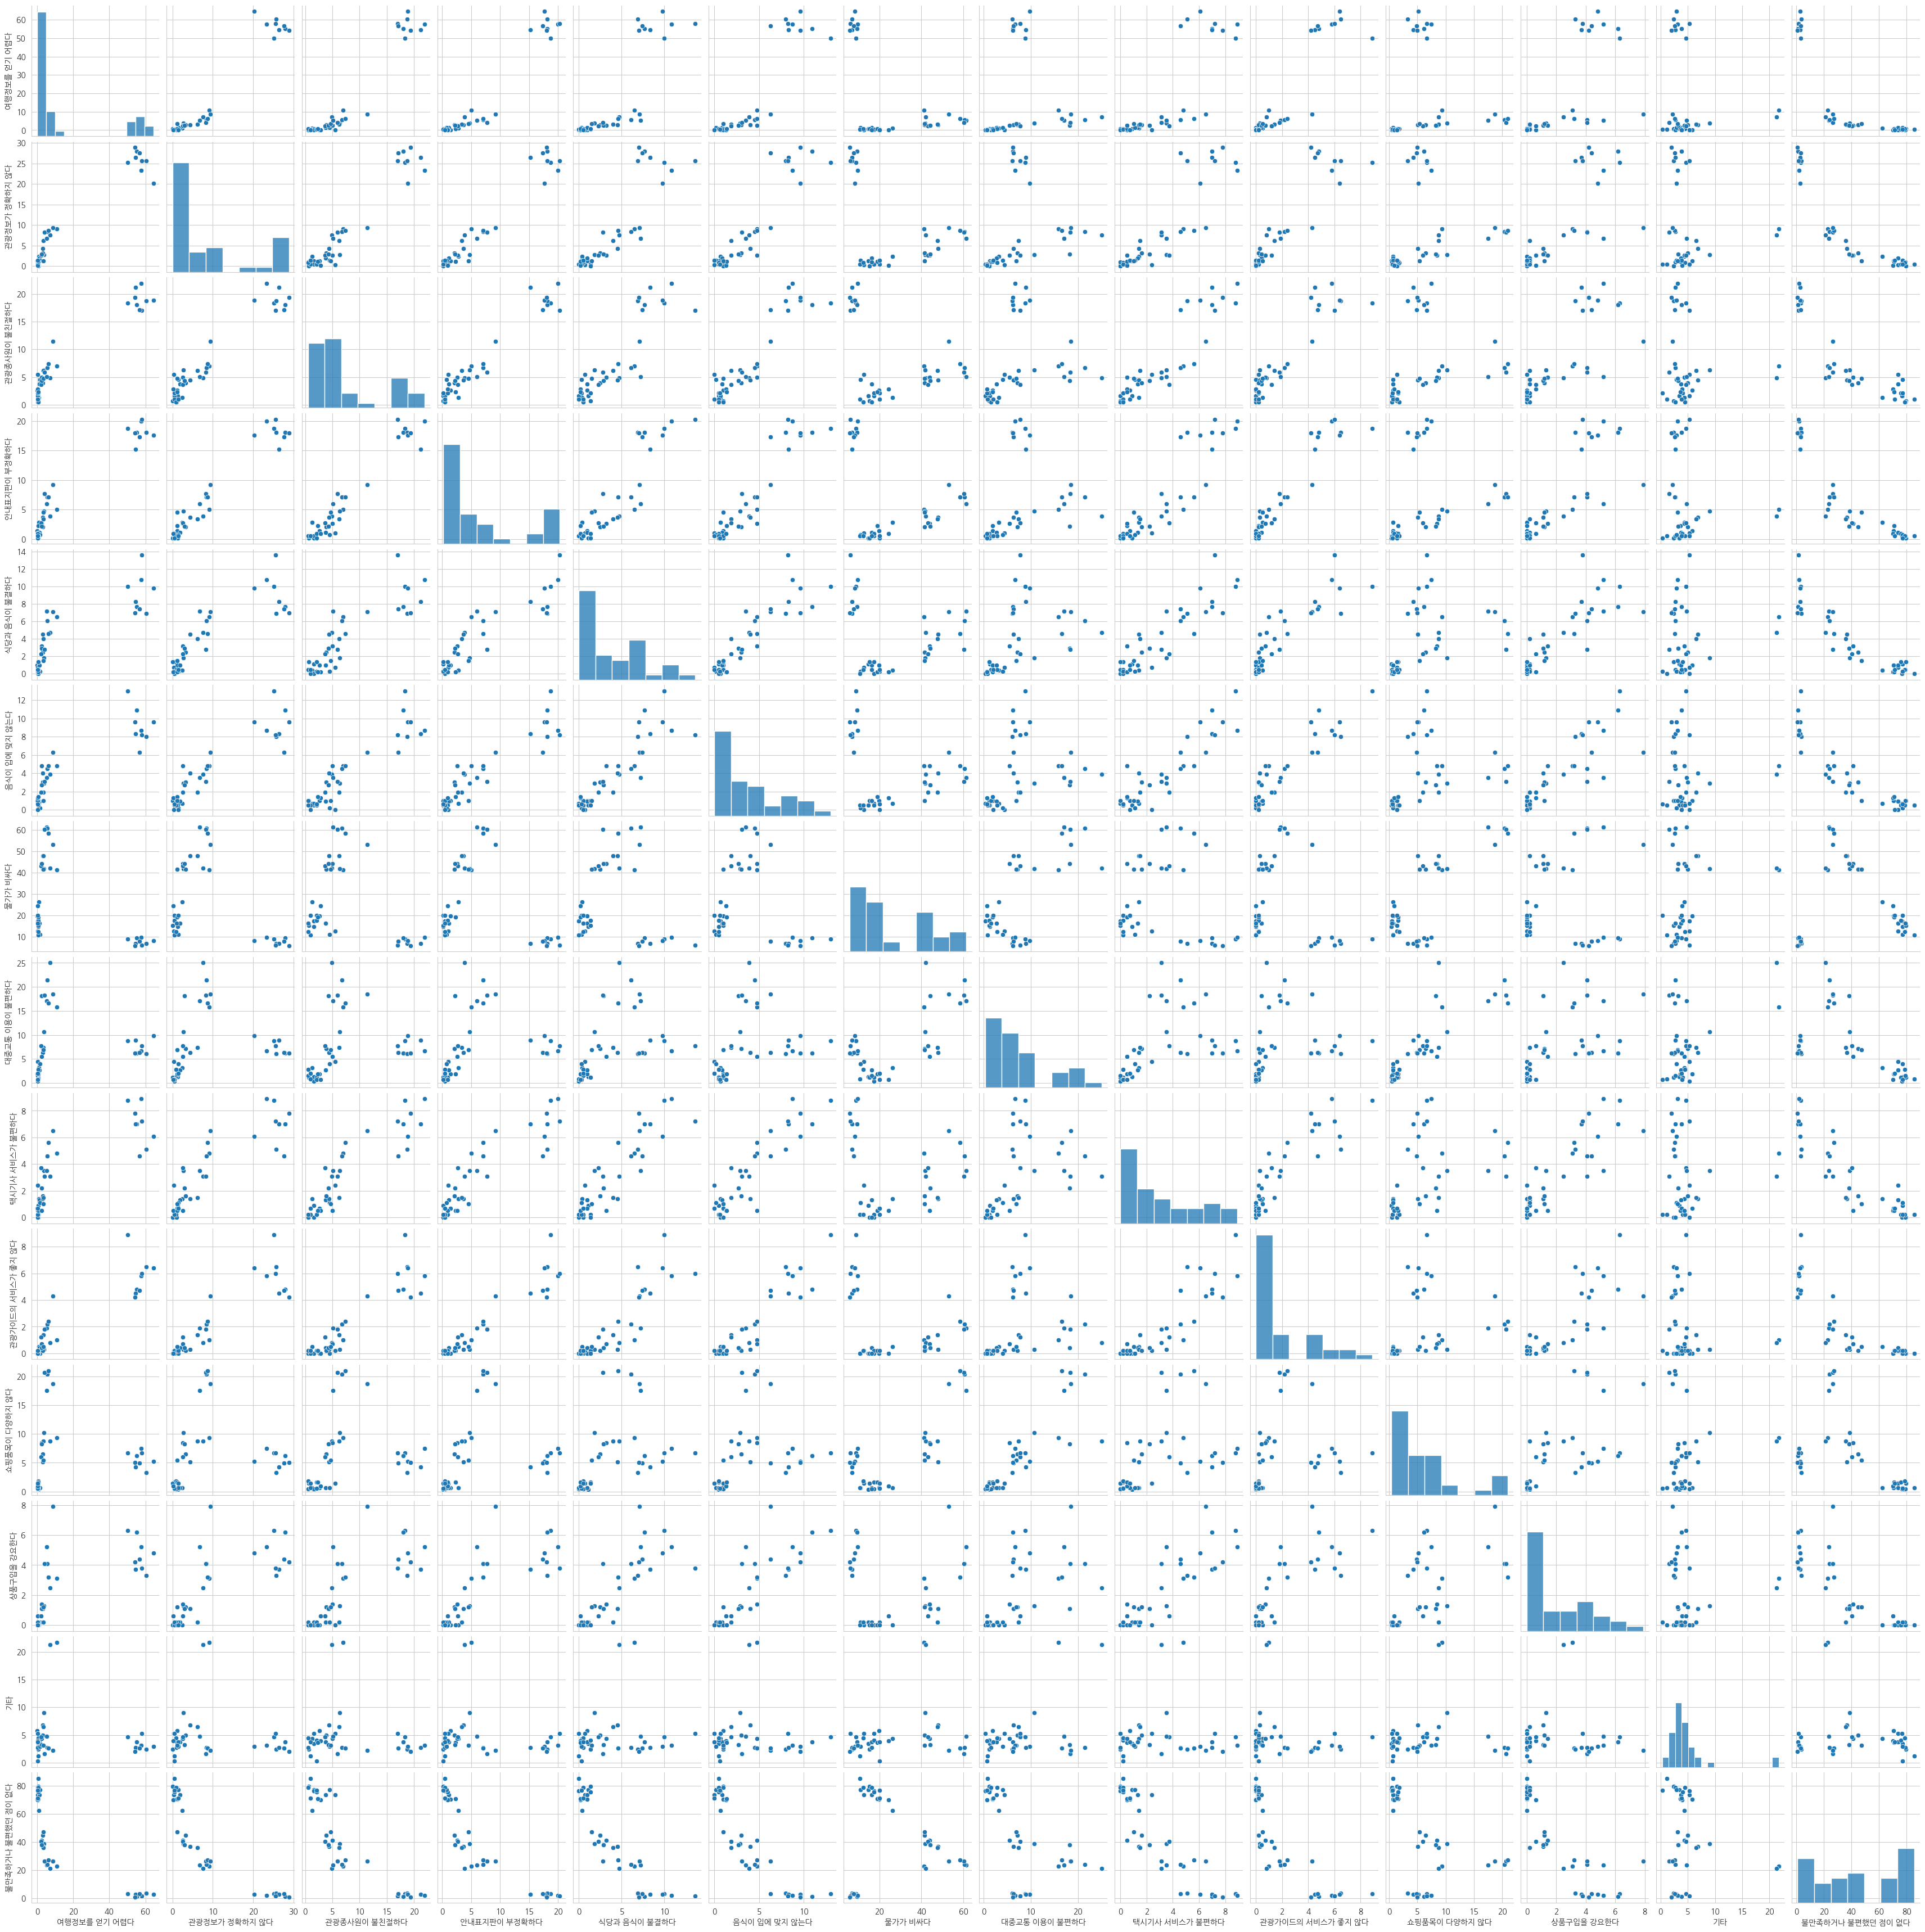

In [73]:
from pandas.plotting import scatter_matrix
sns.pairplot(dis_df, diag_kind='hist')
plt.rcParams['font.family'] = 'NanumGothic'
plt.show()

In [ ]:
col1 = 0
col2 = 14

X = dis_df[:,[col1,col2]]
y = iris.target # y 값은 군집에서 사용하지 않는다

from sklearn.cluster import KMeans

model = KMeans(3)
model.fit(X)

In [38]:
from sklearn.preprocessing import StandardScaler
feature = ['여행정보를 얻기 어렵다',	'관광정보가 정확하지 않다',	'관광종사원이 불친절하다',	'안내표지판이 부정확하다',	'식당과 음식이 불결하다',	'음식이 입에 맞지 않는다',	'물가가 비싸다',	'대중교통 이용이 불편하다','택시기사 서비스가 불편하다',	'관광가이드의 서비스가 좋지 않다',	'쇼핑품목이 다양하지 않다',	'상품구입을 강요한다'	,'기타'	,'불만족하거나 불편했던 점이 없다']
x = merge_dis.loc[:, feature].values
y = merge_dis.loc[:, ['세부 카테고리']].values
x_transformed = StandardScaler().fit_transform(x)
x_transformed.shape

(40, 14)

In [39]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=2, method="ml", rotation=None)

fa.fit(x)
efa_result=pd.DataFrame(fa.loadings_, index=feature)
print(efa_result)

                          0         1
여행정보를 얻기 어렵다       0.976642 -0.186252
관광정보가 정확하지 않다      0.983975 -0.019782
관광종사원이 불친절하다       0.980889  0.000224
안내표지판이 부정확하다       0.991424  0.039472
식당과 음식이 불결하다       0.905103  0.258926
음식이 입에 맞지 않는다      0.940241  0.157468
물가가 비싸다           -0.339766  0.908397
대중교통 이용이 불편하다      0.242391  0.856628
택시기사 서비스가 불편하다     0.902375  0.267364
관광가이드의 서비스가 좋지 않다  0.948786  0.050773
쇼핑품목이 다양하지 않다      0.218742  0.926630
상품구입을 강요한다         0.800687  0.451899
기타                -0.079400  0.261197
불만족하거나 불편했던 점이 없다 -0.887343 -0.404737


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


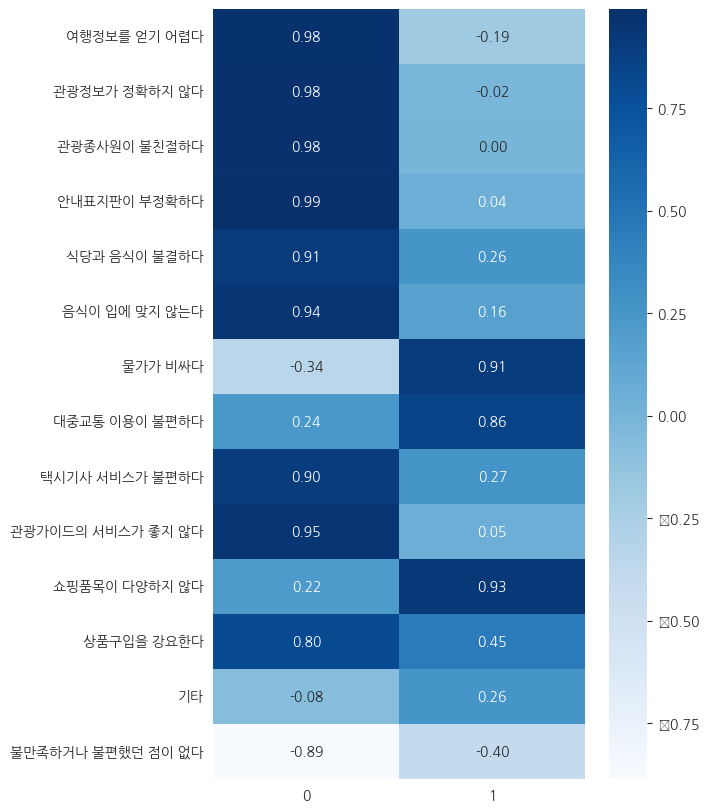

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize = (6,10))
sns.heatmap(efa_result, cmap="Blues", annot =True, fmt='.2f')

### 여행경비 만족도

In [41]:
budget_2018['연도']=2018
budget_2019['연도']=2019
budget_2020['연도']=2020
budget_2021['연도']=2021

In [42]:
merge_budget= pd.concat([budget_2018, budget_2019, budget_2020,budget_2021], axis=0)
merge_budget

,분석 카테고리,세부 카테고리,사례수,① 매우 불만족,② 불만족,③ 보통,④ 만족,⑤ 매우 만족,①+②,③,④+⑤,[5점 평균],[100점 평균],연도
0,월별,01월,477,7,18.5,39.7,24.5,10.4,25.5,39.7,34.9,3.13,53.19,2018
1,월별,02월,410,7.7,17.6,44.8,24.2,5.7,25.3,44.8,29.9,3.03,50.64,2018
2,월별,03월,479,3.8,14.6,29.8,39.1,12.7,18.4,29.8,51.7,3.42,60.54,2018
3,월별,04월,575,0.9,3.5,22.8,57.6,15.1,4.5,22.8,72.7,3.82,70.61,2018
4,월별,05월,567,0.4,2.7,10.7,67.3,18.9,3.1,10.7,86.2,4.02,75.39,2018
5,월별,06월,553,0.5,5,22.3,51.4,20.8,5.5,22.3,72.2,3.87,71.74,2018
6,월별,07월,527,0.9,4.7,23.8,47.9,22.6,5.6,23.8,70.5,3.87,71.65,2018
7,월별,08월,540,1.2,5.9,31,44.6,17.2,7.1,31,61.8,3.71,67.67,2018
8,월별,09월,516,0.7,5,24.5,37.8,32,5.7,24.5,69.8,3.95,73.84,2018
9,월별,10월,528,0.5,5.5,28.7,46.8,18.5,6,28.7,65.3,3.77,69.32,2018
